In [51]:
import pandas as pd

## read crystal- and dco- timestamped data
columns = ['Timestamp'];
crystal_df = pd.read_csv('Data/Old crystal vs dco/Crystal_5.csv', names=columns);
crystal = crystal_df.as_matrix();

dco_df = pd.read_csv('Data/Old crystal vs dco/DCO_5.csv', names=columns);
dco = dco_df.as_matrix();

In [52]:
# crystal file likely to be longer than DCO file, due to different clock frequencies
# (Crystal: 4MHz, DCO: 2MHz)
print(dco[0])
print(crystal[0])
print(dco[0] - crystal[0])
'''
diff = abs(len(crystal) - len(dco));

if(diff > 0):
    if(len(crystal) > len(dco)):
        #crystal = crystal[diff:-1];
        crystal = crystal[0:-diff];
    else:
        #dco = dco[diff:-1];
        dco = dco[0:-diff];
'''


[1486073799085164]
[1486073799079663]
[5501]


'\ndiff = abs(len(crystal) - len(dco));\n\nif(diff > 0):\n    if(len(crystal) > len(dco)):\n        #crystal = crystal[diff:-1];\n        crystal = crystal[0:-diff];\n    else:\n        #dco = dco[diff:-1];\n        dco = dco[0:-diff];\n'

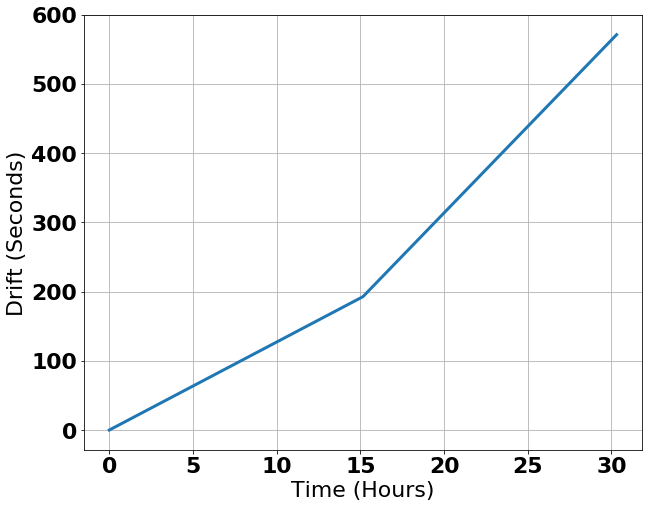

In [125]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Set default plot size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
font = {'family' : 'DejaVu Sans',
        'weight' : 'black',
        'size'   : 22}
matplotlib.rc('font', **font)

# Compute elapsed times
ctime = crystal;
ctime = ctime - ctime[0];

dtime = dco;
dtime = dtime - dtime[0];

#print(drift)
samples = np.linspace(0, len(ctime), num=len(ctime))

drift = abs(ctime - dtime);

#secs = drift[-1] # 26 hours (seconds)
drift = [item for sublist in drift for item in sublist]
f = interp1d(samples,drift);

secs=300000 # 26 hours (seconds)
#\labels = ['0 Hours', '8 Hours', '16 Hours', '24 Hours']

xp = np.linspace(0, len(drift),3)
d = f(xp);
#plt.xticks(xp, labels)
#plt.plot(x,drift,linewidth=5)
d[d > 193000] -= 200000
plt.plot(xp/12500,d/1000,linewidth=3)
plt.grid(True)
plt.xlabel("Time (Hours)");
plt.ylabel("Drift (Seconds)")

plt.show()



In [66]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

print(len(x))
print(len(y))

11
11
